# The Halo Mass Function

We are going to measure the Halo Mass Function from the MPAHalo table in the [millimil](http://galaxy-catalogue.dur.ac.uk:8080/Millennium/) in two ways and from two measures of halo mass. The millimil has been run in a cubic box of comovin side of $62.5 {\rm Mpc}/h$ with dark matter particles with a minnimum mass of $0.86*10^9 {\rm M}_{\odot}/h$. The assumed cosmological parameters in this simulation are: $\Omega_0 = 0.25$, $\Lambda _0 = 0.75$, $\Omega _b = 0.045$ and $h_0 = 0.73$. 

We are going to read the file you previously produced with number of particles and halo masses and we are going to measure and plot the halo mass function from them and directly from an SQL query. For this purpose, we need to import the same packages as before. In order to check the existance of files, we also need 'os.path'.

In [5]:
import numpy as np
import eagleSqlTools as sql
from matplotlib import pyplot as plt
import os.path
%matplotlib notebook

Before we move on to actually obtain the halo mass function, let's read the file you generated previously with the number of particles per halo and a measure of their mass and obtain a histogram grouping by number of particles:

In [6]:
infile = 'nparticles.txt'
if(os.path.isfile(infile)):
    nparticles = np.loadtxt(infile, usecols=(0,), unpack=True)
    hist, bin_edges = np.histogram(nparticles,bins=80)
    print np.size(hist),np.size(bin_edges)

80 81


The center of the bins can be defined beforehand and use an array within np.histogram, but in this case, we need to find the center of the bins from edge_bins to make the plot:

In [7]:
bin_center = (bin_edges[:-1] + bin_edges[1:])/2
print np.size(bin_center)

80


Let's plot a histogram normalised to a maximum value of 1:

<IPython.core.display.Javascript object>


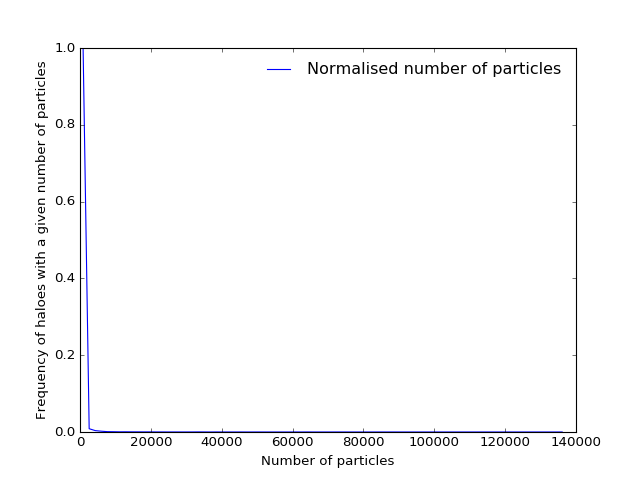

In [8]:
val = float(np.max(hist)) 
y = hist/val

ytit ='Frequency of haloes with a given number of particles'
xtit ='Number of particles'

fig = plt.figure()
plt.xlabel(xtit) ; plt.ylabel(ytit)
plt.plot(bin_center,y, label='Normalised number of particles')

leg = plt.legend(loc=1)
leg.draw_frame(False)
plt.show()

#### Q.1 What is the halo mass function?  

<img src="images/mf_masses.jpg">

#### Q.2 Plot the halo mass function (as a log-log plot)from the file you created previously, using 2 definitions of halo mass in units of $log_{10}({\rm Mass/M}_{\odot}h^{-1})$.

The following SQL retrives the halo mass function for the 'm_Crit200':

<IPython.core.display.Javascript object>


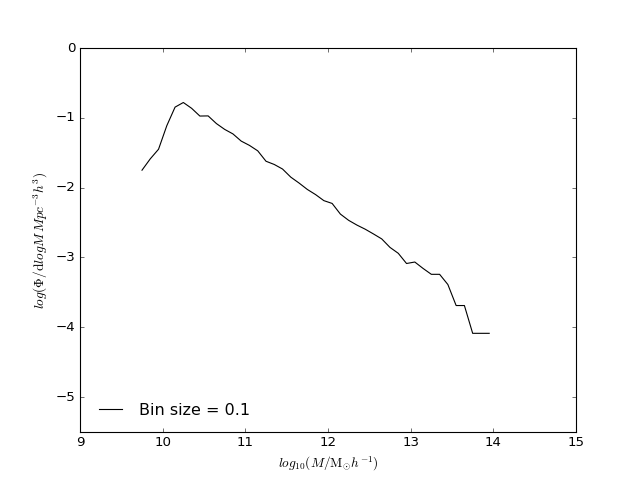

In [9]:
con = sql.connect("xyz", "abc", url="http://virgodb.dur.ac.uk:8080/Millennium")
the_query = """select .1*(.5+floor((log10(m_Crit200)+10.)/.1)) as mass,
                      log10(count(*)/power(62.5,3.)/.1) as phi
               from millimil..mpahalo
               where snapnum = 63 and m_Crit200 > 0 
               group by .1*(.5+floor((log10(m_Crit200)+10.)/.1))
               order by mass"""

data = con.execute_query(the_query)
mass = data["mass"] 
phi = data["phi"]

# Plot
ytit ='$log(\Phi/{\\rm d}logM\,Mpc^{-3}h^{3})$'
xtit ='$log_{10}(M/{\\rm M}_{\odot}h^{-1})$'

fig = plt.figure()
plt.xlabel(xtit) ; plt.ylabel(ytit)
plt.xlim(9.,15.) ; plt.ylim(-5.5,0)
plt.plot(mass,phi,'k',label='Bin size = 0.1')

# Legend
leg = plt.legend(loc=3)
leg.draw_frame(False)

plt.show()

#### Q.3 Modify the query above to change the bin size to 0.2 and plot together with the previous line. Does the normalization change? Why?

#### Q.4 Modify the query above to get the mass from the number of particles and plot together with the 2 previous lines in your plot. Do they match?

#### Q.5 Compare the results from your SQL queries with the halo mass function you obtained from a file in Q.2